In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [2]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
280,OpticalNetwork,turn,2,0.958096,0.958096
473,IstanbulStock,skewed,35,0.412113,0.761883
259,OpticalNetwork,even,119,0.380894,0.532471
174,CommunityCrime,even,162,0.518585,0.566709
73,Hydrodynamics,skewed,23,-0.019501,0.791909


In [3]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.944973,0.895982
46,Hydrodynamics,even,0.000619,0.988501
47,Hydrodynamics,random,-0.002573,0.940687
48,Hydrodynamics,skewed,-0.000754,0.983942
49,Hydrodynamics,turn,0.944973,0.944830


<Axes: xlabel='csv_file'>

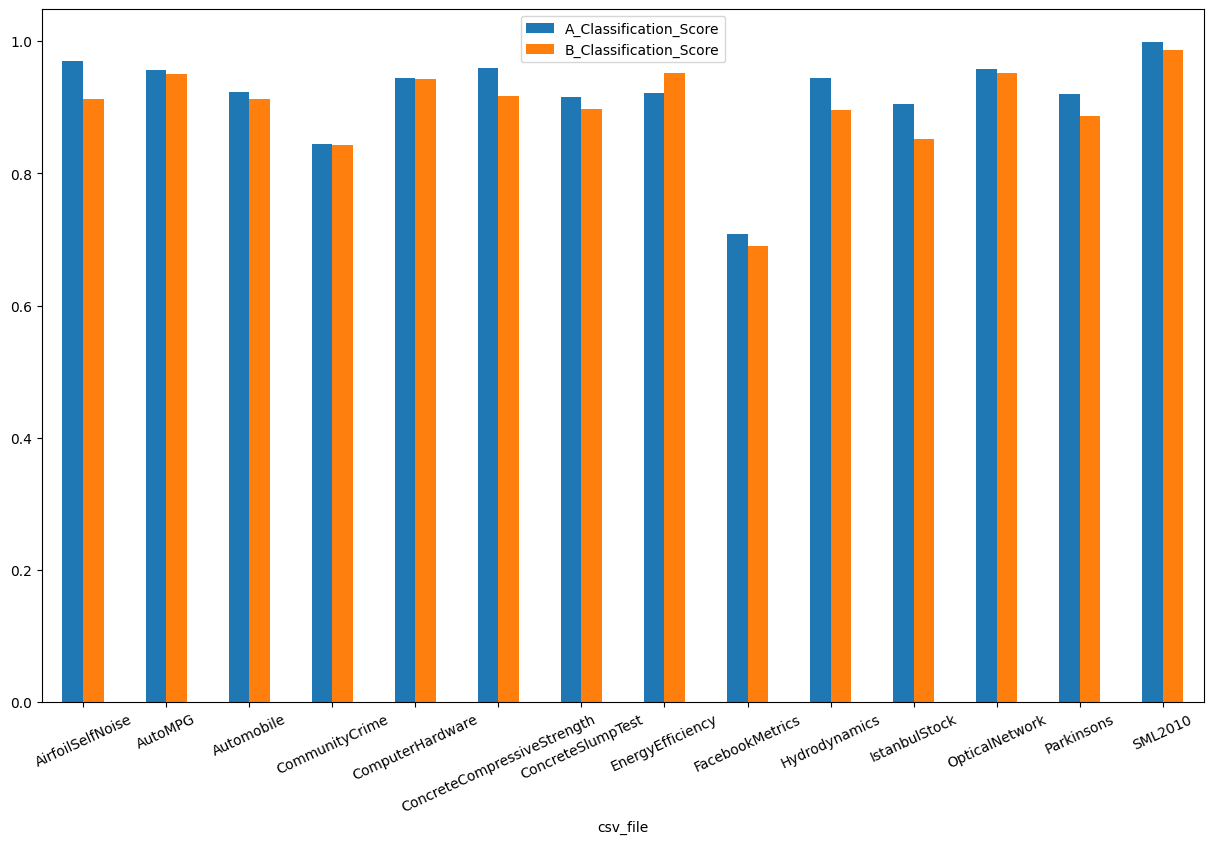

In [4]:
baselines_grouped[baselines_grouped["split"] == "distort"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 

# Model Comparison

In [5]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
reg_df.sample(5)


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
70,RF-SPUD,CommunityCrime,turn,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...","{'42': -0.21352462673438732, '1738': -0.259248...","{'42': 5.030135542032315e-06, '1738': 5.281642...","{'42': -0.1130138114421424, '1738': -0.0906852...","{'42': -0.06519425163305148, '1738': -0.044836...","{'42': -0.0384803899731172, '1738': -0.0227439...","{'42': 0.9572378153750606, '1738': 1.008575621...","{'42': 0.9694716284485135, '1738': 1.019410786...","{'42': {'RF-OOB': -0.08674561090166377, 'KNN':...",{}
67,RF-NAMA,EnergyEfficiency,even,0.3,"{'OD_method': 'absolute_distance', 'agg_method...",{'42': -0.21858848065206504},{'42': 0.008994208441840278},{'42': -0.08346603574834166},{'42': -0.020643640263587004},{'42': 0.011859541437130083},{'42': 1.0058137466524755},{'42': 1.0222221637536297},"{'42': {'RF-OOB': -0.10172858300905574, 'KNN':...",{}
175,MALI,Automobile,even,0.3,"{'knn': 2, 'mu': 0.01, 't': 5, 'transition_onl...",{'42': 0.6650129441918424},{'42': 0.1731735295281041},{'42': 0.5737918705104579},{'42': 0.4230297277676879},{'42': 0.7145433928367452},{'42': 0.38343837447934964},{'42': 0.545132711947813},"{'42': {'RF-OOB': 0.6463416329315612, 'KNN': 0...",{}
48,RF-NAMA,EnergyEfficiency,distort,0.3,"{'OD_method': 'mean', 'agg_method': 'log'}","{'42': -0.15492706965147263, '1738': -0.158425...","{'42': 0.001532660590277778, '1738': 0.0015835...","{'42': -0.04557272420026992, '1738': -0.064489...","{'42': -0.01899859165390194, '1738': -0.007213...","{'42': -0.02912917139706117, '1738': 0.0084605...","{'42': 1.0264626955672977, '1738': 1.006520059...","{'42': 1.0213980351243523, '1738': 1.014444184...","{'42': {'RF-OOB': -0.051608660477232116, 'KNN'...",{}
180,MAPA,Automobile,distort,0.3,"{'knn': 26, 'r': 20}","{'42': 0.7866662341207133, '1738': 0.814274759...","{'42': 0.013608728438118577, '1738': 0.0121830...","{'42': 0.8024405364299148, '1738': 0.175511172...","{'42': 0.8658431362215947, '1738': -0.12037018...","{'42': 0.6216539764707979, '1738': 0.005055699...","{'42': 0.6196685200812636, '1738': 1.033148570...","{'42': 0.3689956918490817, '1738': 1.096337240...","{'42': {'RF-OOB': 0.9028495154976739, 'KNN': 0...",{}


In [6]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(baselines_grouped, how = "left")

In [7]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
16,RF-NAMA,Hydrodynamics,skewed,0.3,-0.077416,0.000011,-0.176157,-0.498376,-0.245343,0.897267,0.984209,"{'42': {'RF-OOB': -0.18978230780338734, 'KNN':...",-0.077427,-0.000754,0.983942
204,RF-SPUD,IstanbulStock,random,0.3,0.110223,0.004335,0.485709,0.345104,0.430537,0.739386,0.784485,"{'42': {'RF-OOB': 0.645349194306896, 'KNN': 0....",0.105888,0.758377,0.665585
187,RF-SPUD,Automobile,even,0.3,0.635726,0.000593,0.848424,0.751230,0.653720,0.422318,0.357952,"{'42': {'RF-OOB': 0.7749779541596445, 'KNN': 0...",0.635133,0.960598,0.932907


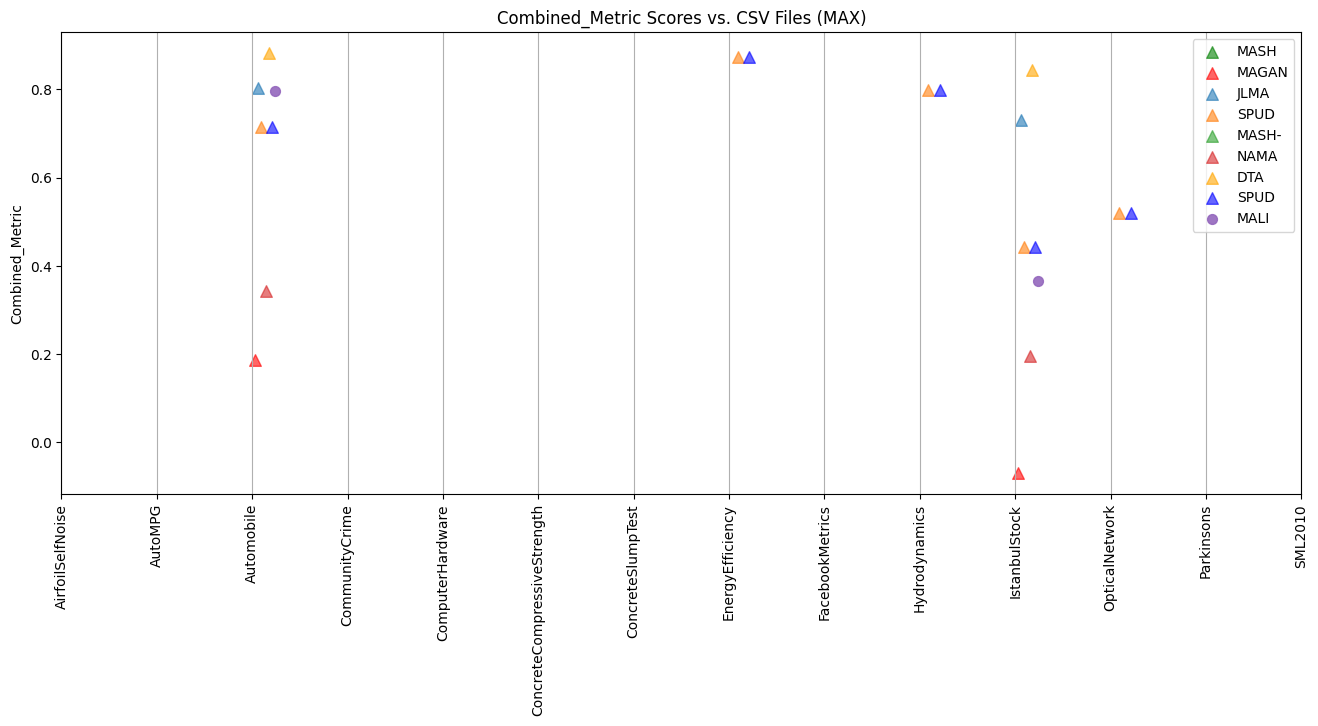

In [8]:
plt_methods_by_CSV_max(df = proc_reg_df, plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

In [9]:
proc_reg_df["method"].nunique()

11

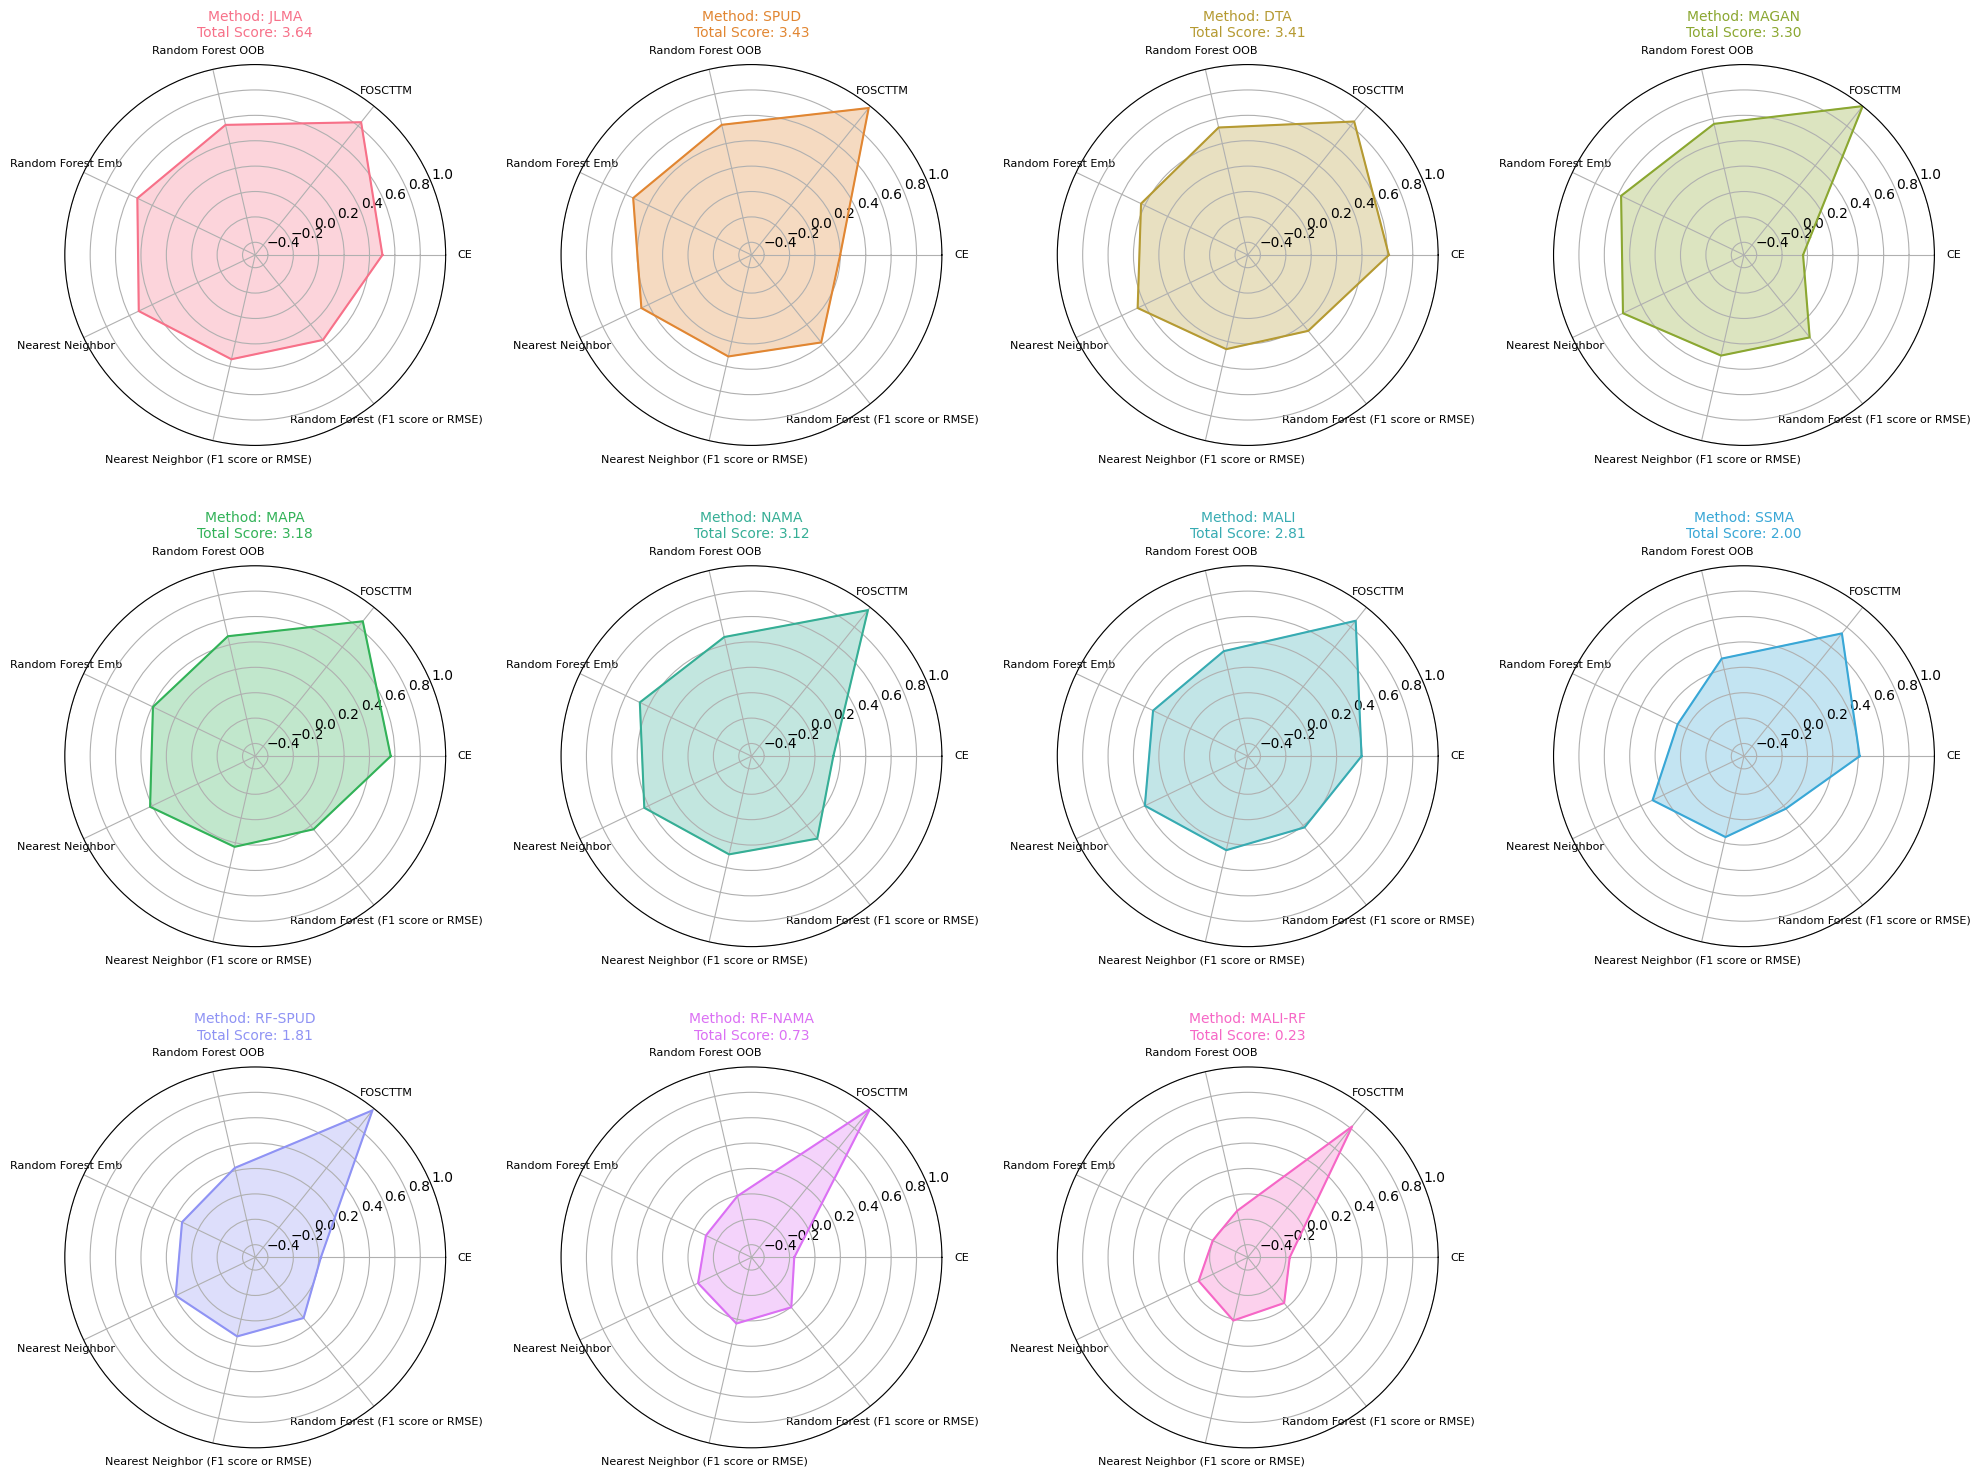

In [10]:
plot_radial(proc_reg_df, ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [11]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
52,RF-SPUD,EnergyEfficiency,turn,0.3,-0.160751,0.000000,0.009412,-0.017413,0.020887,1.003786,1.023271,"{'42': {'RF-OOB': 0.007908467253103568, 'KNN':...",-0.160751,0.921075,0.920912
210,SPUD,IstanbulStock,skewed,0.3,0.373705,0.000003,0.391049,0.502999,0.504727,0.787288,0.788660,"{'42': {'RF-OOB': 0.3680762322786788, 'KNN': 0...",0.373701,0.700491,0.936911


In [12]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores.sample(2)


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
50,0.716426,0.533947,0.744573,0.611964,0.504207
185,0.153065,0.655042,0.119602,0.470550,0.659930


In [13]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
222,SPUD,IstanbulStock,turn,0.3,-0.143553,0.499071,-0.090088,-0.037430,-0.003766,1.034360,1.051179,-0.642623,0.904693,0.904693,0.050774,1.089915,0.115266,-0.079124,1.052239
36,RF-SPUD,Hydrodynamics,skewed,0.3,-0.135742,0.006072,-0.161351,-0.303903,-0.044395,0.821693,0.918121,-0.141814,-0.000754,0.983942,-0.469251,0.974597,-0.534085,-0.139555,0.995868


In [14]:
full_data.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

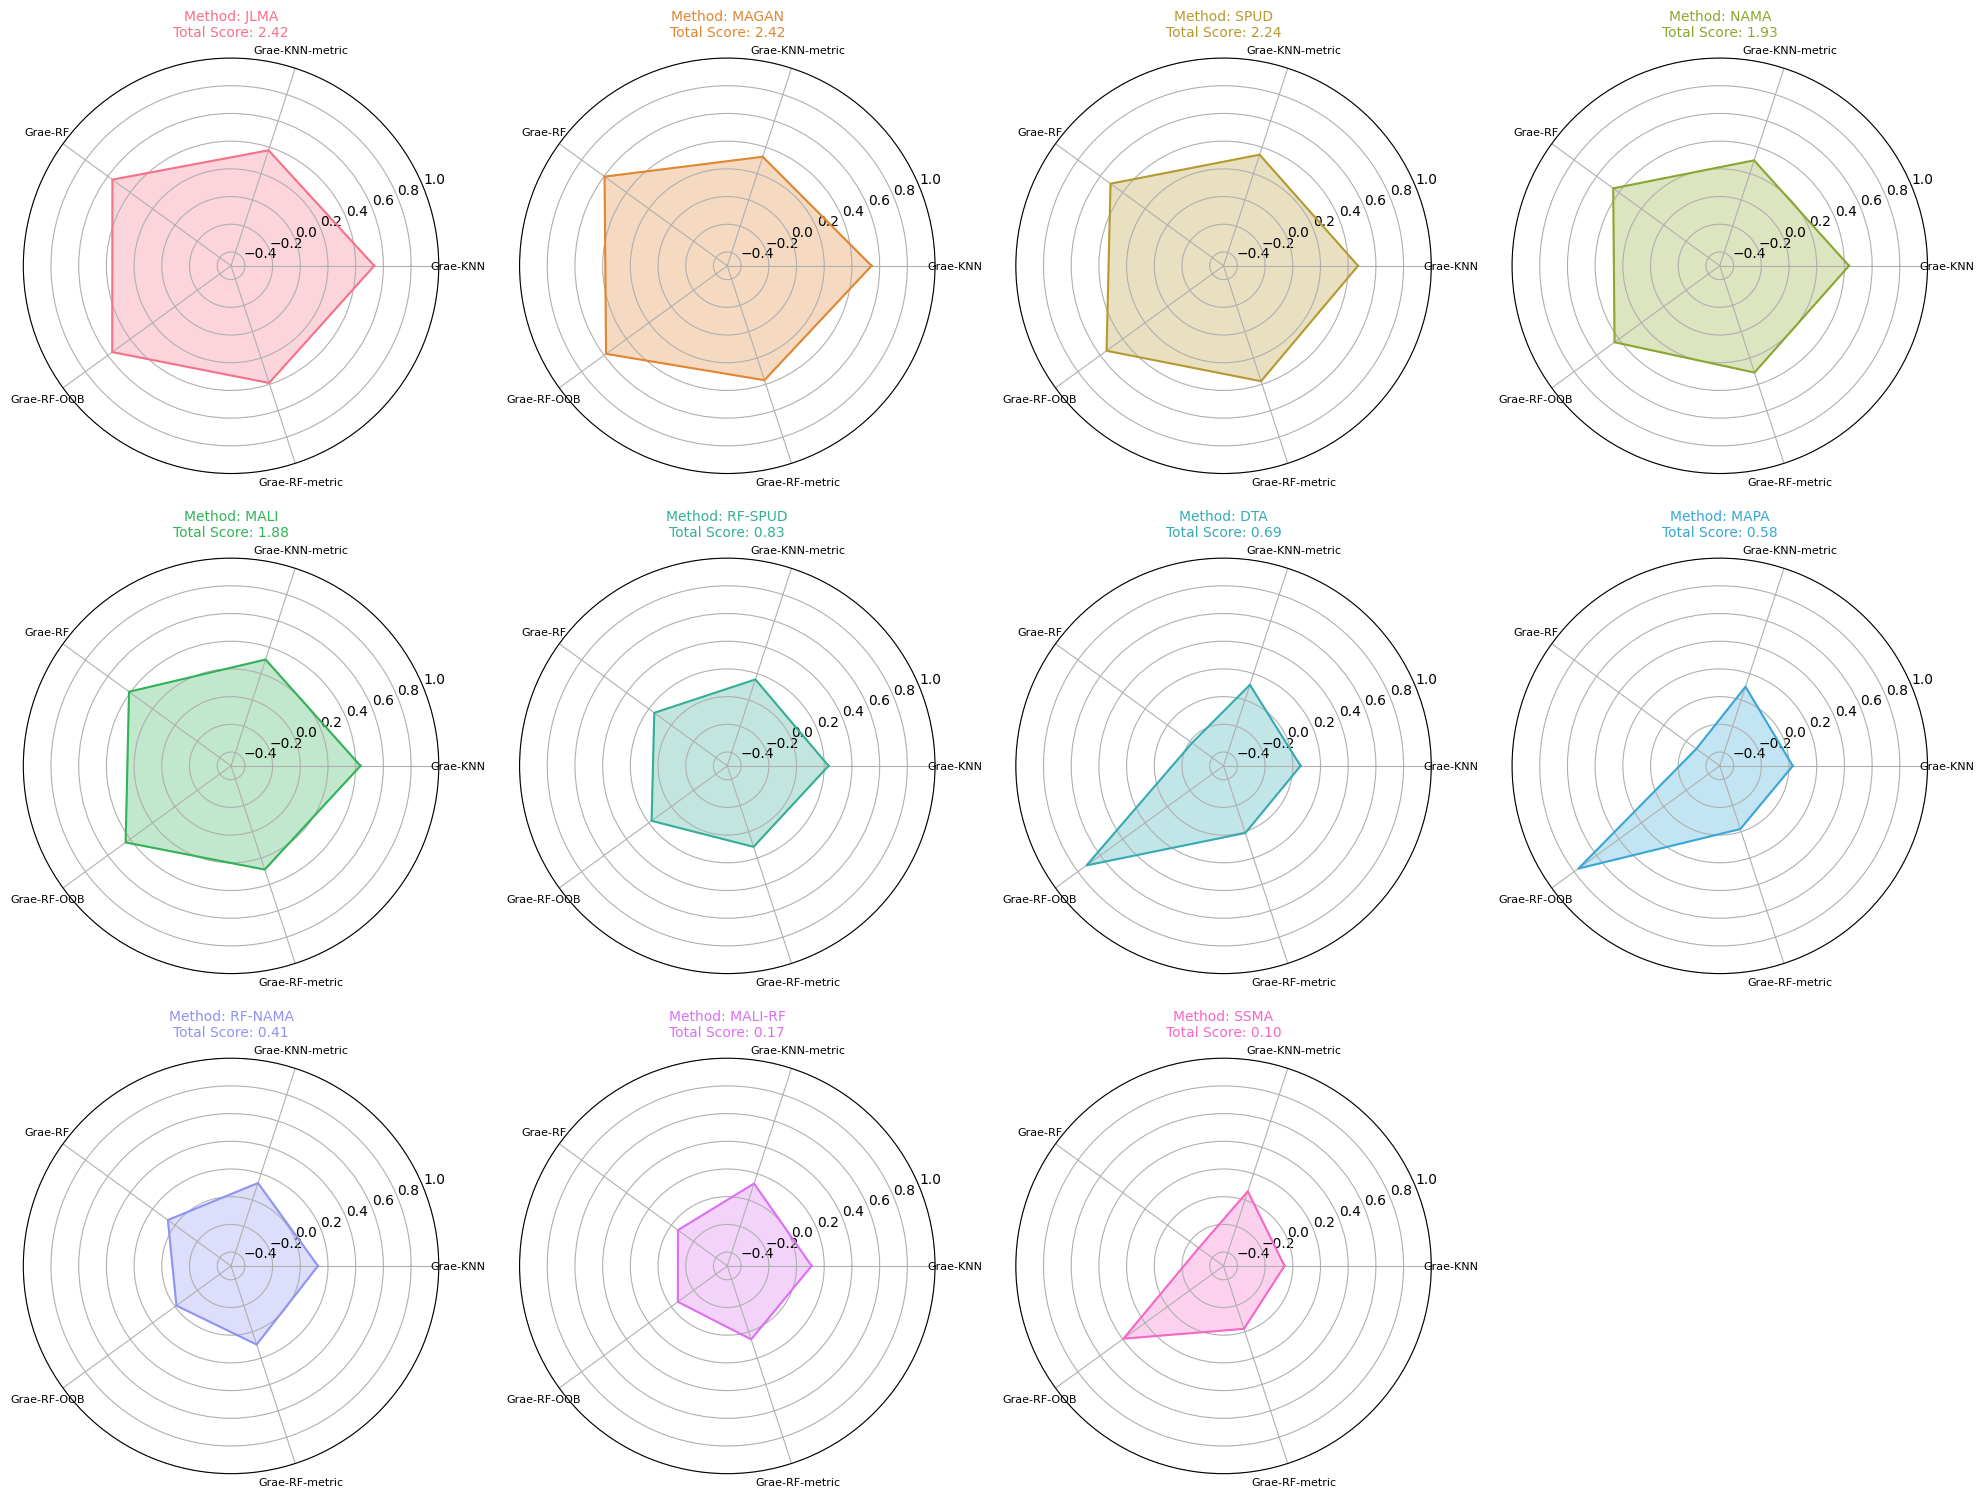

In [15]:
plot_radial(full_data, [#'CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          #'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)',
                          'Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'])

# Compare Grae to RF Extend

In [16]:
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
244,NAMA,IstanbulStock,skewed,0.3,0.195860,0.000003,0.454503,0.497505,0.475249,0.810378,0.793007,0.195857,0.700491,0.936911,0.472294,0.812656,0.473238,0.412728,0.811929
49,SPUD,EnergyEfficiency,even,0.3,0.781833,0.000858,0.897118,0.905186,0.863212,0.374225,0.311562,0.780975,0.960900,0.893321,0.871025,0.363380,0.921112,0.918794,0.284193


In [18]:
group_df = full_data.drop(columns = ["csv_file", "split", "Percent_of_Anchors", "A_Classification_Score", "B_Classification_Score"]).groupby(by = "method").mean()
group_df#.plot( )

,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
method,,,,,,,,,,,,,
DTA,0.611557,0.155085,0.529997,0.432495,0.462371,0.739296,0.735648,0.456472,0.056336,0.884493,-0.218431,0.722380,0.990333
JLMA,0.501854,0.162319,0.551183,0.530538,0.518167,0.657575,0.644220,0.339535,0.533915,0.623205,0.558703,0.560296,0.610311
MAGAN,-0.034628,0.000036,0.559473,0.574275,0.557891,0.687289,0.669784,-0.034664,0.541743,0.672096,0.595340,0.582118,0.631515
MALI,0.396467,0.135697,0.348545,0.327541,0.399278,0.740535,0.782533,0.260769,0.434489,0.692655,0.410467,0.440822,0.712516
MALI-RF,-0.169098,0.180822,-0.124203,-0.193887,-0.071122,0.989601,1.040049,-0.349920,0.109130,0.874197,-0.059728,-0.058879,0.942376
MAPA,0.567379,0.141108,0.469050,0.394021,0.419214,0.767619,0.763404,0.426270,0.027227,0.898920,-0.290633,0.762064,1.020381
NAMA,0.144735,0.028503,0.462780,0.476018,0.437034,0.706883,0.669221,0.116232,0.433145,0.699513,0.451403,0.439341,0.689423
RF-NAMA,-0.162976,0.000864,-0.004473,-0.101937,-0.032847,0.965344,0.997124,-0.163840,0.127749,0.870303,0.063912,-0.012594,0.902966
RF-SPUD,0.017197,0.018744,0.222862,0.139760,0.195082,0.861398,0.889091,-0.001547,0.231157,0.843795,0.151608,0.175475,0.885066


In [27]:
group_df.columns, group_df.index

(Index(['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb',
        'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
        'Random Forest (F1 score or RMSE)', 'Combined_Metric', 'Grae-KNN',
        'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
       dtype='object'),
 Index(['DTA', 'JLMA', 'MAGAN', 'MALI', 'MALI-RF', 'MAPA', 'NAMA', 'RF-NAMA',
        'RF-SPUD', 'SPUD', 'SSMA'],
       dtype='object', name='method'))

In [20]:
rf_extend = group_df[['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)']]  
grae = group_df[['Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric']]

In [30]:
dif_values = rf_extend.values - grae.values

diff_df = pd.DataFrame(dif_values, index = group_df.index, columns = rf_extend.columns)
diff_df

,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
method,,,,,
DTA,0.473661,-0.451999,0.680802,0.016916,-0.254686
JLMA,0.017267,-0.092667,-0.040535,0.097279,0.033908
MAGAN,0.017730,-0.097821,-0.037448,0.105170,0.038269
MALI,-0.085944,-0.365114,-0.011190,0.299713,0.070017
MALI-RF,-0.233333,-1.068085,-0.011394,1.048479,0.097673
MAPA,0.441823,-0.504900,0.709846,0.005555,-0.256976
NAMA,0.029635,-0.223495,-0.014369,0.267542,-0.020201
RF-NAMA,-0.132222,-0.972240,-0.096759,0.977939,0.094158
RF-SPUD,-0.008294,-0.704035,0.043474,0.685924,0.004026


<Axes: xlabel='method'>

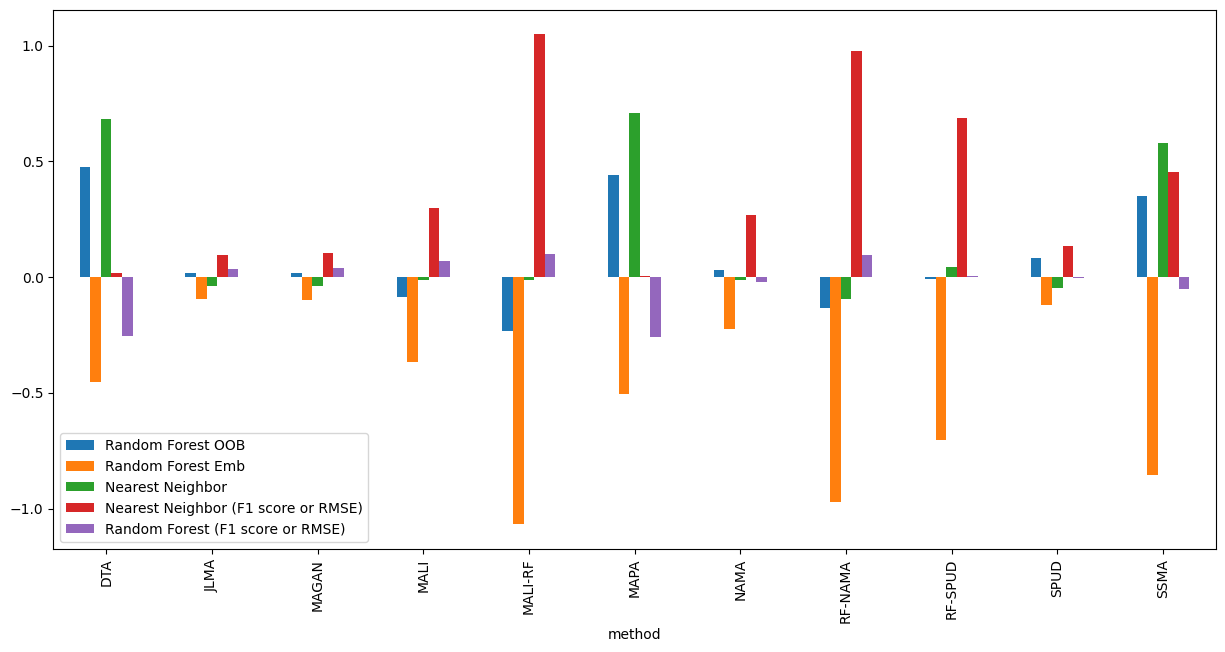

In [ ]:
"""
Note that this below isn't really an assesment of how well each method did, but how different Grae is from the non-Grae
"""
diff_df.plot(kind = "bar", figsize=(15,7)) # Calculated Non-Grae verisons - Grae_versions

# Veiw Feature variance

In [22]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
43,RF-SPUD,EnergyEfficiency,turn,0.3,"{'knn': 66, 'OD_method': 'default', 'agg_metho...",-0.139224,0.002194,"{'42': 0.4536029430926377, '1738': 0.413303788...","{'42': 0.35473700668890573, '1738': 0.42403562...","{'42': 0.25990920678808194, '1738': 0.22609903...","{'42': 0.8704638243632383, '1738': 0.889221846...","{'42': 0.8127867317507502, '1738': 0.767123415...","{'42': {'RF-OOB': 0.4473457818989043, 'KNN': 0...",{},-0.141418
261,DTA,IstanbulStock,skewed,0.3,"{'knn': 90, 'distances': 'DPT'}",0.474816,0.245580,{'42': 0.5110131212671974},{'42': 0.5197160944363848},{'42': 0.5493809101261828},{'42': 0.6523570629870102},{'42': 0.6734875821238903},"{'42': {'RF-OOB': 0.41114007856127366, 'KNN': ...",{},0.229236


### Spud Parameters on STD

In [23]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.108420,0.106438,0.099911
1,0.212055,0.009160,0.259480
2,0.082494,0.004531,0.065047
3,0.122127,0.019535,0.116753
4,0.233281,0.142308,0.391829
5,0.123241,0.049513,0.095527
6,0.105121,0.073130,0.112089
7,0.120282,0.066215,0.059469
8,0.427449,0.009660,0.007884
9,0.348501,0.000684,0.037910


<Axes: >

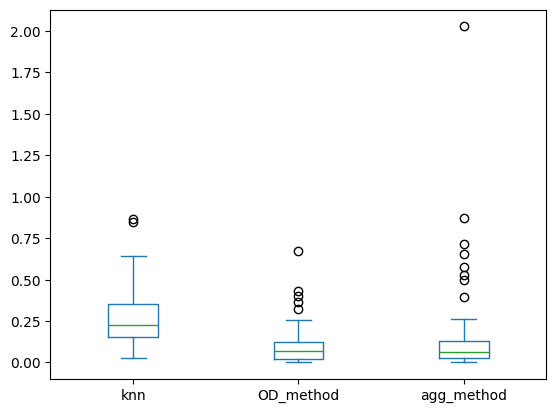

In [24]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [25]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

""


In [26]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

TypeError: no numeric data to plot

In [ ]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.000000,0.000000,0.000000e+00
1,0.000000,0.000000,0.000000e+00
2,0.000000,0.000000,0.000000e+00
3,0.000000,0.000000,0.000000e+00
4,0.034208,0.022954,1.110223e-16
5,0.000000,0.000000,1.110223e-16
6,0.000000,0.003440,1.110223e-16
7,0.000000,0.000000,0.000000e+00
8,0.000000,0.001427,0.000000e+00
9,0.000000,0.000000,0.000000e+00


<Axes: >

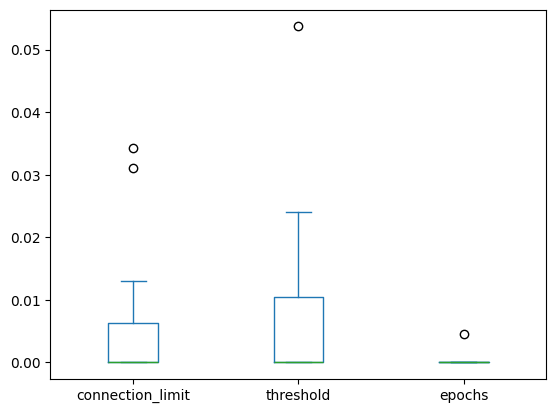

In [ ]:
mash_param_df.plot(kind = "box") 